In [328]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [329]:
train_original = pd.read_csv('dataset/application_train.csv')
test_original = pd.read_csv('dataset/application_test.csv')

application_train = pd.read_csv('dataset/application_train.csv')
application_test = pd.read_csv('dataset/application_test.csv')


In [330]:
Y = train_original['TARGET']

In [331]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
#function that takes in df and/or columns list and return their missinf value percentage df

def calculate_percentage_missing_df(df,columns = None):
    if columns is None:
        columns = df.columns
    percent_missing = df[columns].isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
    return missing_value_df


In [333]:
#function that takes in df and columns list and return their each class prob for categorical column

def calculate_class_ratio(df,col):
    class_ratio_before = df[col].value_counts(normalize=True)
    return class_ratio_before
    

In [334]:
#function that takes in df and column list and impute missing value of columns with random sample

def impute_with_random_sample_with_prob(df,df_test, columns = None):
    if columns is None:
        columns = df.columns
    for column in columns:
        if(df[column].isnull().sum())>0 or (df_test[column].isnull().sum())>0:
            class_ratio = calculate_class_ratio (df,column)
            missing = df[column].isnull()
            missing_test = df_test[column].isnull()
            df.loc[missing,column] = np.random.choice(class_ratio.index, size=len(df[missing]),p=class_ratio.values)
            df_test.loc[missing_test,column] = np.random.choice(class_ratio.index, size=len(df_test[missing_test]),p=class_ratio.values)

In [335]:
def impute_with_mean(df,df_test,columns=None):
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column].fillna((df[column].mean()), inplace=True)
        df_test[column].fillna((df[column].mean()), inplace=True)
    

def impute_with_median(df,df_test,columns=None):
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column].fillna((df[column].median()), inplace=True)
        df_test[column].fillna((df[column].mean()), inplace=True)

def impute_with_mode(df, df_test, columns = None):
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column].fillna((df[column].mode()[0]), inplace=True)
        df_test[column].fillna((df[column].mode()[0]), inplace=True)

In [336]:
def find_list_of_continous_var_columns(df, columns = None):
    continous_val_cols =[]
    if columns is None:
        columns = df.columns
    for column in columns:
        if len(df[column].unique()) > 20:
            continous_val_cols.append(column)
    return continous_val_cols

In [337]:
missing_value_df = calculate_percentage_missing_df(application_train)

In [338]:
# missing_value_df

In [339]:
print(application_train.shape)
print(application_test.shape)

(307511, 122)
(48744, 121)


# 1. Dropping Columns with missing value more than 50%

In [340]:

missing_cols=[]
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 50:
        missing_cols.append(index)
        

In [341]:
application_train.drop(missing_cols, axis=1, inplace=True)
application_test.drop(missing_cols, axis=1, inplace=True)

In [342]:
print(application_train.shape)
print(application_test.shape)

(307511, 81)
(48744, 80)


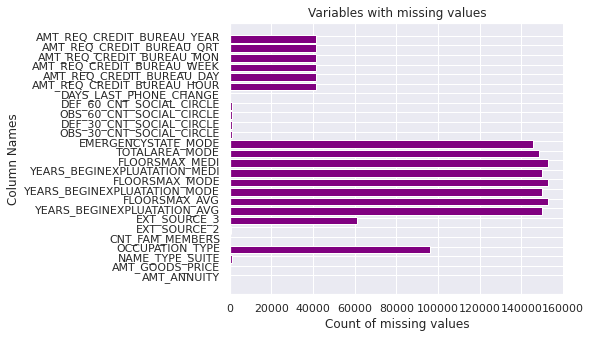

In [343]:
sns.set(font_scale=1)

# see if there are any more columns with missing values 
null_columns = application_train.columns[application_train.isnull().any()]
application_train.isnull().sum()

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(application_train[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [344]:
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(application_train.select_dtypes(include=numeric_lst).columns)

In [345]:
categorical_cols = list(set(application_train.columns)- set(numerical_cols))

In [346]:
print(application_train.shape)
print(len(categorical_cols))
print(len(numerical_cols))

(307511, 81)
13
68


# Visualization

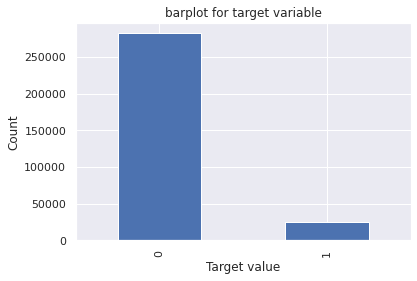

In [347]:
train_original['TARGET'].value_counts().plot.bar()
plt.xlabel('Target value')
plt.ylabel('Count')
plt.title('barplot for target variable')
plt.show()

The target variable is highly imbalanced.

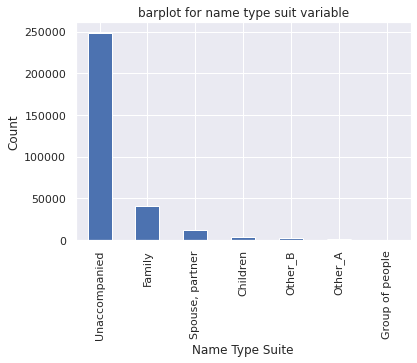

In [348]:
train_original['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.xlabel('Name Type Suite')
plt.ylabel('Count')
plt.title('barplot for name type suit variable')
plt.show()

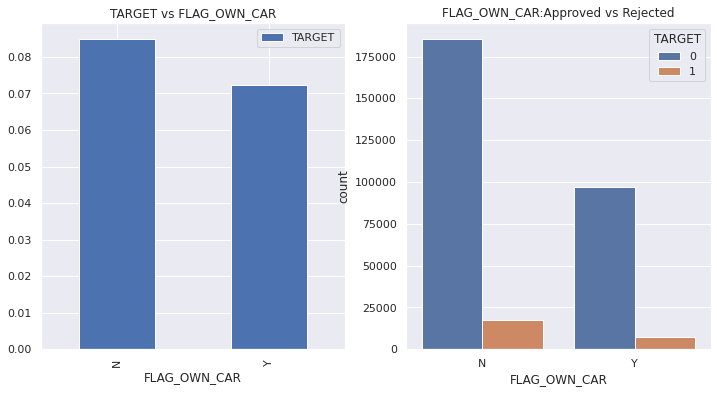

In [386]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

f,ax=plt.subplots(1,2,figsize=(12,6))
train_original[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR']).mean().plot.bar(ax=ax[0])
ax[0].set_title('TARGET vs FLAG_OWN_CAR')
sns.countplot('FLAG_OWN_CAR',hue='TARGET',data=train_original,ax=ax[1])
ax[1].set_title('FLAG_OWN_CAR:Approved vs Rejected')
plt.show()

In [ ]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

f,ax=plt.subplots(1,2,figsize=(12,6))
train_original[['CODE_GENDER','FLAG_OWN_CAR']].groupby(['CODE_GENDER']).mean().plot.bar(ax=ax[0])
ax[0].set_title('CODE vs FLAG_OWN_CAR')
sns.countplot('CODE_GENDER',hue='FLAG_OWN_CAR',data=train_original,ax=ax[1])
ax[1].set_title('CODE_GENDER: owing car ')
plt.show()

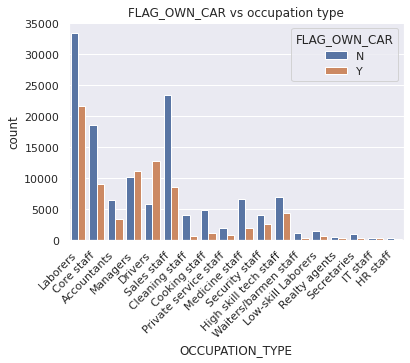

In [387]:
ax = sns.countplot(x = "OCCUPATION_TYPE", hue="FLAG_OWN_CAR", data = train_original)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.title('FLAG_OWN_CAR vs occupation type')
plt.show()

Most of the laborers, sales staff , medicine staff does own a car

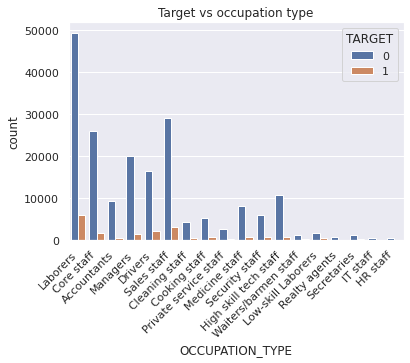

In [349]:
ax = sns.countplot(x = "OCCUPATION_TYPE", hue="TARGET", data = train_original)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.title('Target vs occupation type')
plt.show()

most of the applicants belongs to occupation type laborers

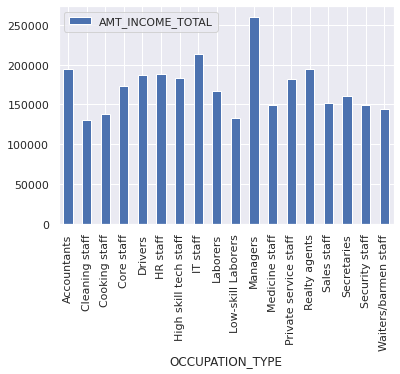

In [350]:
income_mean = pd.DataFrame(train_original.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean())
income_mean.plot(kind="bar")
plt.show()

Among different occupation type Managers have the highest mean income and low-skill labors have the lowest.

In [351]:
train_original.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().to_frame().style.background_gradient(cmap='summer_r')

,TARGET
OCCUPATION_TYPE,
Accountants,0.048303
Cleaning staff,0.096067
Cooking staff,0.104440
Core staff,0.063040
Drivers,0.113261
HR staff,0.063943
High skill tech staff,0.061599
IT staff,0.064639
Laborers,0.105788


out of 100 low-skill labor applicants 17 people are consider risk while in case of managers out of 100 only 6 are considered risk 

Occupation type and amt income total has inpact on target value

In [352]:
train_original['Age'] = train_original['DAYS_BIRTH']/(-365)
train_original['Age_Range'] = pd.qcut(train_original['Age'],6)
train_original.groupby(['Age_Range'])['TARGET'].mean().to_frame().style.background_gradient(cmap='summer_r')

,TARGET
Age_Range,
"(20.517, 30.805]",0.114137
"(30.805, 37.195]",0.098849
"(37.195, 43.151]",0.081780
"(43.151, 50.173]",0.075768
"(50.173, 57.589]",0.063043
"(57.589, 69.121]",0.050784


People belonging to age group 20-30 are consider more risk than other age group.


In [353]:
train_original['AMT_INCOME_TOTAL_Range']=pd.qcut(train_original['AMT_INCOME_TOTAL'],12)
train_original.groupby(['AMT_INCOME_TOTAL_Range'])['TARGET'].mean().to_frame().style.background_gradient(cmap='summer_r')

,TARGET
AMT_INCOME_TOTAL_Range,
"(25649.999, 76500.0]",0.079067
"(76500.0, 90000.0]",0.084071
"(90000.0, 112500.0]",0.086951
"(112500.0, 117000.0]",0.088441
"(117000.0, 135000.0]",0.084697
"(135000.0, 147150.0]",0.090007
"(147150.0, 157500.0]",0.087080
"(157500.0, 180000.0]",0.083741
"(180000.0, 202500.0]",0.079798


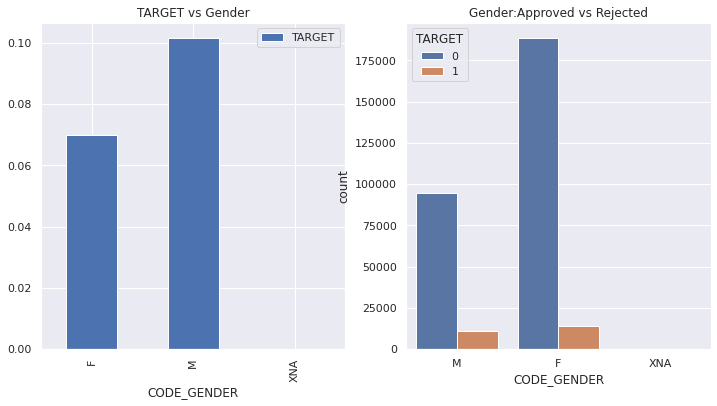

In [355]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

f,ax=plt.subplots(1,2,figsize=(12,6))
train_original[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER']).mean().plot.bar(ax=ax[0])
ax[0].set_title('TARGET vs Gender')
sns.countplot('CODE_GENDER',hue='TARGET',data=train_original,ax=ax[1])
ax[1].set_title('Gender:Approved vs Rejected')
plt.show()

In [356]:
train_original.groupby(['CODE_GENDER'])['TARGET'].mean().to_frame().style.background_gradient(cmap='summer_r')

,TARGET
CODE_GENDER,
F,0.069993
M,0.101419
XNA,0.000000


In [357]:
pd.crosstab(train_original.CODE_GENDER,train_original.TARGET,margins=True).style.background_gradient(cmap='Set3')

TARGET,0,1,All
CODE_GENDER,,,
F,188278,14170,202448
M,94404,10655,105059
XNA,4,0,4
All,282686,24825,307511


The number of male is less than the number of female. Around 6% of total female are consider risk while around 10-11% of total male are consider risks.

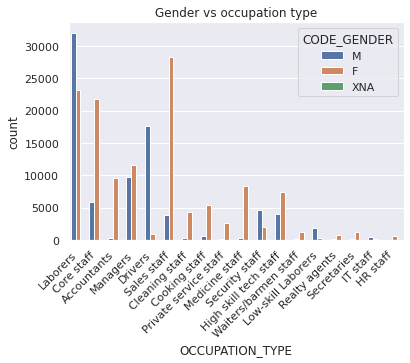

In [358]:
ax = sns.countplot(x = "OCCUPATION_TYPE", hue="CODE_GENDER", data = train_original)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.title('Gender vs occupation type')
plt.show()

Most of the sales staff, medicine staff, high skill tech staff and accountants are female

Most of the drivers are male

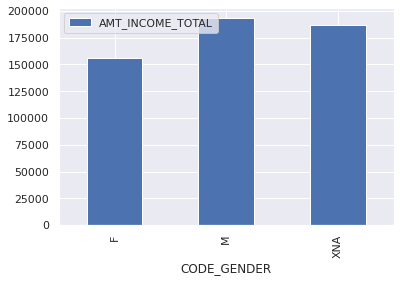

In [359]:
income_mean = pd.DataFrame(train_original.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].mean())
income_mean.plot(kind="bar")
plt.show()

mean amt income total of female is higher than male

In [360]:
train_original['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [361]:
train_original['EXT_SOURCE_3'].isnull().sum()

60965

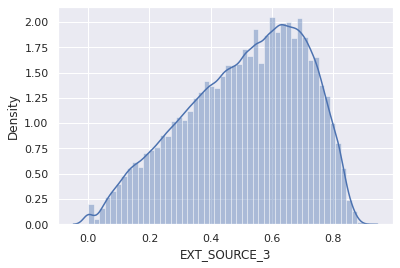

In [362]:
sns.distplot(train_original['EXT_SOURCE_3'])
plt.show()

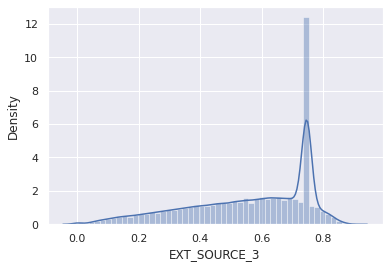

In [363]:
sns.distplot(train_original['EXT_SOURCE_3'].fillna(train_original['EXT_SOURCE_3'].mode()[0]))
plt.show()

In [364]:
train_original['EXT_SOURCE_3'].fillna(train_original['EXT_SOURCE_3'].median()).describe()

count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [365]:
# df_new['EXT_SOURCE_3'] = train_original['EXT_SOURCE_3'].copy()
df_new =  train_original[['EXT_SOURCE_3']].copy()

s = df_new.EXT_SOURCE_3.value_counts(normalize=True)

missing = df_new['EXT_SOURCE_3'].isnull()

df_new.loc[missing,'EXT_SOURCE_3'] = np.random.choice(s.index, size=len(df_new[missing]),p = s.values)

In [366]:
df_new['EXT_SOURCE_3'].fillna(train_original['EXT_SOURCE_3'].median()).describe()

count    307511.000000
mean          0.510775
std           0.194597
min           0.000527
25%           0.370650
50%           0.535276
75%           0.667458
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

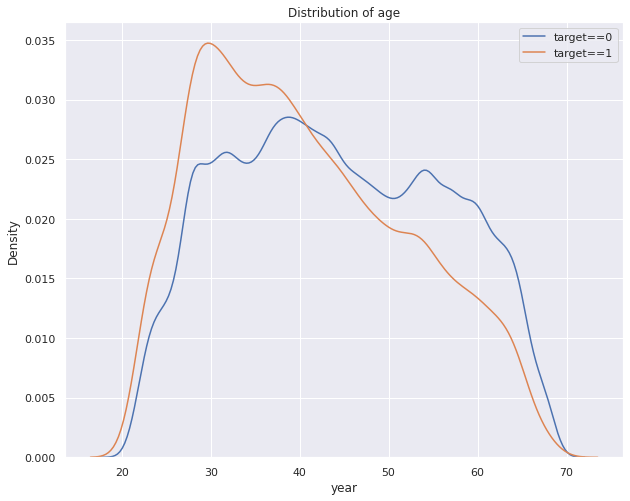

In [367]:
plt.figure(figsize=(10,8))

sns.kdeplot(train_original.loc[train_original['TARGET']==0,'Age'],label='target==0')

sns.kdeplot(train_original.loc[train_original['TARGET']==1,'Age'],label='target==1')

plt.xlabel('year');
plt.ylabel('Density');
plt.title('Distribution of age');
plt.legend()
plt.show()

In [368]:
test_original['OCCUPATION_TYPE'].isnull().sum()

15605

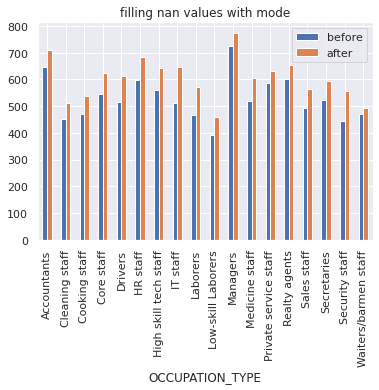

In [369]:

# checking mean income before and after imputation by mode for each occupation type
df_mode =  train_original[['OCCUPATION_TYPE','AMT_CREDIT']].copy()
df_mode['OCCUPATION_TYPE'] = df_mode['OCCUPATION_TYPE'].fillna(df_mode['OCCUPATION_TYPE'].mode()[0])


before_mean = pd.DataFrame(test_original.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)

after_mean = pd.DataFrame(df_mode.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)


compare_mean = pd.DataFrame({'before': before_mean['AMT_CREDIT'],'after': after_mean['AMT_CREDIT']})
compare_mean.plot.bar()
plt.title('filling nan values with mode')
plt.show()


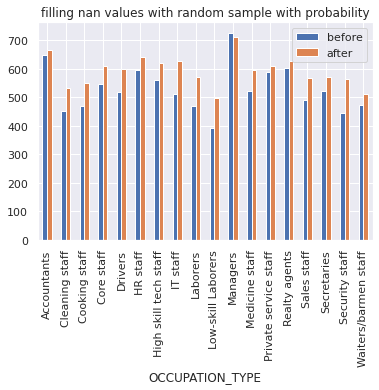

In [370]:
# checking mean income before and after imputation by random sample with probability for each occupation type
df_prop =  train_original[['OCCUPATION_TYPE','AMT_CREDIT']].copy()

class_ratio_before = df_prop.OCCUPATION_TYPE.value_counts(normalize=True)

missing = df_prop['OCCUPATION_TYPE'].isnull()
df_prop.loc[missing,'OCCUPATION_TYPE'] = np.random.choice(class_ratio_before.index, size=len(df_prop[missing]),p=class_ratio_before.values)


before_mean = pd.DataFrame(test_original.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)

after_mean = pd.DataFrame(df_prop.groupby('OCCUPATION_TYPE', as_index=True)['AMT_CREDIT'].mean()/1000)


compare_mean = pd.DataFrame({'before': before_mean['AMT_CREDIT'],'after': after_mean['AMT_CREDIT']})
compare_mean.plot.bar()
plt.title('filling nan values with random sample with probability')
plt.show()

In [371]:
class_ratio_original = test_original.OCCUPATION_TYPE.value_counts(normalize=True)
class_ratio_mode = df_mode.OCCUPATION_TYPE.value_counts(normalize=True)
class_ratio_prob = df_prop.OCCUPATION_TYPE.value_counts(normalize=True)

In [372]:
data = {"original": class_ratio_original,
        "mode imputed": class_ratio_mode,
        "randomsample imputed": class_ratio_prob}

df_concat_res = pd.concat(data,
               axis = 1)
df_concat_res

,original,mode imputed,randomsample imputed
Laborers,0.261173,0.492916,0.261604
Sales staff,0.153052,0.104393,0.151686
Core staff,0.131597,0.089655,0.131345
Managers,0.107849,0.069497,0.101658
Drivers,0.083678,0.060495,0.087558
High skill tech staff,0.055946,0.037007,0.053975
Accountants,0.049126,0.031911,0.046457
Medicine staff,0.039712,0.027762,0.040421
Security staff,0.027611,0.021856,0.031683
Cooking staff,0.026977,0.019336,0.027979


In [382]:
df_mode['TARGET'] = train_original['TARGET']
df_prop['TARGET'] = train_original['TARGET']

pd.crosstab(df_mode.OCCUPATION_TYPE,df_mode.TARGET,margins=True,normalize=True).style.background_gradient(cmap='Set3')

TARGET,0,1,All
OCCUPATION_TYPE,,,
Accountants,0.030370,0.001541,0.031911
Cleaning staff,0.013678,0.001454,0.015131
Cooking staff,0.017316,0.002019,0.019336
Core staff,0.084003,0.005652,0.089655
Drivers,0.053644,0.006852,0.060495
HR staff,0.001714,0.000117,0.001831
High skill tech staff,0.034727,0.002280,0.037007
IT staff,0.001600,0.000111,0.001711
Laborers,0.453515,0.039400,0.492916


In [383]:
pd.crosstab(df_prop.OCCUPATION_TYPE,df_prop.TARGET,margins=True,normalize=True).style.background_gradient(cmap='Set3')

TARGET,0,1,All
OCCUPATION_TYPE,,,
Accountants,0.044109,0.002348,0.046457
Cleaning staff,0.019837,0.001899,0.021736
Cooking staff,0.025342,0.002637,0.027979
Core staff,0.122961,0.008383,0.131345
Drivers,0.078908,0.008650,0.087558
HR staff,0.002566,0.000172,0.002738
High skill tech staff,0.050541,0.003434,0.053975
IT staff,0.002374,0.000189,0.002563
Laborers,0.237286,0.024318,0.261604


In [384]:
pd.crosstab(train_original.OCCUPATION_TYPE,train_original.TARGET,margins=True,normalize=True).style.background_gradient(cmap='Set3')

TARGET,0,1,All
OCCUPATION_TYPE,,,
Accountants,0.044236,0.002245,0.046481
Cleaning staff,0.019922,0.002117,0.022040
Cooking staff,0.025223,0.002941,0.028164
Core staff,0.122357,0.008232,0.130589
Drivers,0.078136,0.009980,0.088116
HR staff,0.002496,0.000171,0.002667
High skill tech staff,0.050583,0.003320,0.053903
IT staff,0.002330,0.000161,0.002491
Laborers,0.233744,0.027653,0.261396


When we impute the categorical value with random sample with probability the proportion or distribution remains same after imputation whereas in case if imputation with mode the distribution differs slightly after imputation.

# 2. HANDLING CATEGORICAL COLUMNS

# 2.1 handling missing values

In [20]:
application_train[categorical_cols].isnull().sum()

FLAG_OWN_REALTY                    0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
NAME_TYPE_SUITE                 1292
FLAG_OWN_CAR                       0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
OCCUPATION_TYPE                96391
NAME_EDUCATION_TYPE                0
CODE_GENDER                        0
WEEKDAY_APPR_PROCESS_START         0
dtype: int64

In [21]:
missing_value_df = calculate_percentage_missing_df(application_train[categorical_cols])
missing_value_df

,percent_missing
EMERGENCYSTATE_MODE,47.398304
OCCUPATION_TYPE,31.345545
NAME_TYPE_SUITE,0.420148
FLAG_OWN_REALTY,0.000000
ORGANIZATION_TYPE,0.000000
FLAG_OWN_CAR,0.000000
NAME_INCOME_TYPE,0.000000
NAME_CONTRACT_TYPE,0.000000
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000


comment:


Percentage of missing value is higher so we impute the missing value with random sample with probability

In [22]:
#imputing both train and test set

impute_with_random_sample_with_prob(application_train,application_test,categorical_cols)

In [23]:
application_train[categorical_cols].isnull().sum()

FLAG_OWN_REALTY               0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
NAME_TYPE_SUITE               0
FLAG_OWN_CAR                  0
NAME_INCOME_TYPE              0
NAME_CONTRACT_TYPE            0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
OCCUPATION_TYPE               0
NAME_EDUCATION_TYPE           0
CODE_GENDER                   0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

In [24]:
application_test[categorical_cols].isnull().sum()

FLAG_OWN_REALTY               0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
NAME_TYPE_SUITE               0
FLAG_OWN_CAR                  0
NAME_INCOME_TYPE              0
NAME_CONTRACT_TYPE            0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
OCCUPATION_TYPE               0
NAME_EDUCATION_TYPE           0
CODE_GENDER                   0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

# 2.2 handling encoding of categorical variable

In [25]:
len(categorical_cols)

13

In [26]:
application_train[categorical_cols].apply(pd.Series.nunique, axis = 0)

FLAG_OWN_REALTY                2
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
NAME_TYPE_SUITE                7
FLAG_OWN_CAR                   2
NAME_INCOME_TYPE               8
NAME_CONTRACT_TYPE             2
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
OCCUPATION_TYPE               18
NAME_EDUCATION_TYPE            5
CODE_GENDER                    3
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

In [27]:
application_test[categorical_cols].apply(pd.Series.nunique, axis = 0)

FLAG_OWN_REALTY                2
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
NAME_TYPE_SUITE                7
FLAG_OWN_CAR                   2
NAME_INCOME_TYPE               7
NAME_CONTRACT_TYPE             2
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             5
OCCUPATION_TYPE               18
NAME_EDUCATION_TYPE            5
CODE_GENDER                    2
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

In [28]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

we can use label encoding for variable that has 2 unique values

column CODE_GENDER has three unique values in train set and one of them has very small no so we can drop the rows having that value in CODE_GENDER

In [29]:
application_train = application_train[application_train.CODE_GENDER != 'XNA']

In [30]:
application_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
label_encode_cols = ['FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','EMERGENCYSTATE_MODE','FLAG_OWN_CAR','CODE_GENDER']

In [32]:
for column in categorical_cols:
    print(column,application_train[column].unique())
 

FLAG_OWN_REALTY ['Y' 'N']
ORGANIZATION_TYPE ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']
EMERGENCYSTATE_MODE ['No' 'Yes']
NAME_TYPE_SUITE ['Unaccompanie



Applying mean encoding for columns: NAME_TYPE_SUITE, ORGANIZATION_TYPE, WEEKDAY_APPR_PROCESS_START, NAME_FAMILY_STATUS
They are nominal variable and also the no of unique values is large so one hot encoding is not applicable as increases the size


label encoding columns NAME_INCOME_TYPE, NAME_HOUSING_TYPE, NAME_EDUCATION_TYPE, OCCUPATION_TYPE as they are ordinal variables


one hot encoding: CODE_GENDER

In [33]:
label_encode_cols = label_encode_cols + ['NAME_INCOME_TYPE','NAME_HOUSING_TYPE',
                                         'NAME_EDUCATION_TYPE','OCCUPATION_TYPE']

In [34]:
mean_encode_cols = ['NAME_TYPE_SUITE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_FAMILY_STATUS']

In [35]:
label_encode_cols

['FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

In [36]:
len(label_encode_cols)+len(mean_encode_cols)

13

In [37]:
len(categorical_cols)

13

# 2.2.1 label encoding

In [38]:
#label encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in label_encode_cols:
    le.fit(application_train[col])
    
    # Transform both training and testing data
    application_train[col] = le.transform(application_train[col])
    application_test[col] = le.transform(application_test[col])
    

# 2.2.2 mean encoding

In [39]:
application_train[mean_encode_cols].head()

,NAME_TYPE_SUITE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS
0,Unaccompanied,Business Entity Type 3,WEDNESDAY,Single / not married
1,Family,School,MONDAY,Married
2,Unaccompanied,Government,MONDAY,Single / not married
3,Unaccompanied,Business Entity Type 3,WEDNESDAY,Civil marriage
4,Unaccompanied,Religion,THURSDAY,Single / not married


In [40]:
mean_encode_cols

['NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_FAMILY_STATUS']

In [41]:
# application_train[mean_encode_cols].head()

In [42]:
# application_test[mean_encode_cols].head()

In [43]:

for col in mean_encode_cols:
    Mean_encoded_subject = application_train.groupby([col])['TARGET'].mean().to_dict()
    application_train[col] = application_train[col].map(Mean_encoded_subject)
    application_test[col] = application_test[col].map(Mean_encoded_subject)

In [44]:
# application_train[mean_encode_cols].head()

In [45]:
# application_test[mean_encode_cols].head()

In [46]:
# application_train[categorical_cols].head()

In [47]:
# application_test[categorical_cols].head()

# 2.3 filtering categorical columns using chi square value

In [48]:
from sklearn.feature_selection import chi2


X = application_train[categorical_cols]
y = application_train['TARGET']
chi_scores = chi2(X,y)

In [49]:
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

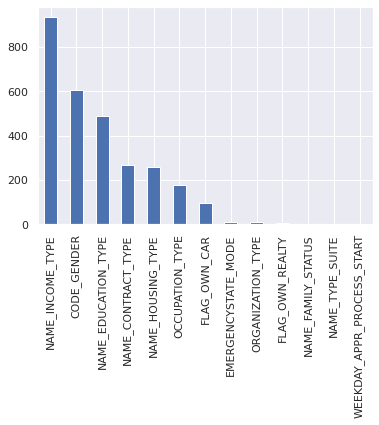

In [50]:
chi_values.plot.bar()

hypothesis: Two categorical value are independent

higher the chisquare value more the feature are dependent and should be selected 

higher chisquare value implies lower pvalue

In [51]:
dropping_cat_cols = ['WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','FLAG_OWN_REALTY',
                     'EMERGENCYSTATE_MODE']

In [52]:
categorical_cols = list(set(categorical_cols)- set(dropping_cat_cols))

In [53]:
print(application_train.shape)
print(application_train.shape)

(307507, 81)
(307507, 81)


In [54]:
application_train.drop(dropping_cat_cols, axis=1, inplace=True)
application_test.drop(dropping_cat_cols, axis=1, inplace=True)

In [55]:
print(application_train.shape)
print(application_train.shape)

(307507, 76)
(307507, 76)


# 3. HANDLING NUMERIC BOOL COLUMNS

In [56]:
#seperating binary values columns

bool_cols = [col for col in numerical_cols if 
               application_train[col].dropna().value_counts().index.isin([0,1]).all()]

In [57]:
len(bool_cols)

33

In [58]:
not_bool_numeric_cols = list(set(numerical_cols) - set(bool_cols))
len(not_bool_numeric_cols)

35

In [59]:
len(numerical_cols)

68

In [60]:
bool_cols.remove('TARGET')

In [61]:
application_train[bool_cols].isnull().sum()

FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUM

# 3.1 filering boolean value columns using chisquare value

In [62]:
from sklearn.feature_selection import chi2

X = application_train[bool_cols]
y = application_train['TARGET']
chi_scores = chi2(X,y)

In [63]:
chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False , inplace = True)

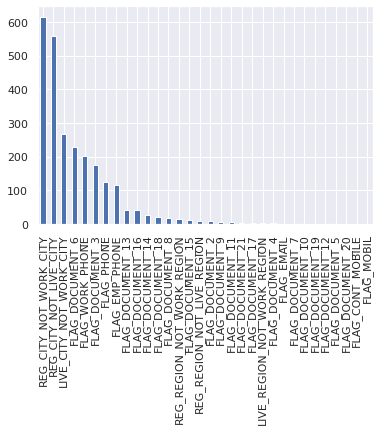

In [64]:
chi_values.plot.bar()
plt.show()

In [65]:
# bool_cols

In [66]:
dropping_bool_cols = ['FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_DOCUMENT_20','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10',
                      'FLAG_DOCUMENT_19','FLAG_DOCUMENT_12','FLAG_DOCUMENT_5','FLAG_EMAIL','FLAG_DOCUMENT_4',
                     'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11','FLAG_DOCUMENT_21',
                     'FLAG_DOCUMENT_17']

In [67]:
bool_cols = list(set(bool_cols)-set(dropping_bool_cols))
numerical_cols = list(set(numerical_cols)-set(dropping_bool_cols))

In [68]:
print(application_train.shape)
print(application_train.shape)

(307507, 76)
(307507, 76)


In [69]:
application_train.drop(dropping_bool_cols, axis=1, inplace=True)
application_test.drop(dropping_bool_cols, axis=1, inplace=True)

In [70]:
print(application_train.shape)
print(application_train.shape)

(307507, 61)
(307507, 61)


# 4. Handling NonBoolean Numeric Columns

# 4.1 filling null values

In [71]:
len(not_bool_numeric_cols)

35

In [72]:
#get the list of columns having null values

null_numeric_columns = []
for col in not_bool_numeric_cols:
    if application_train[col].isnull().sum() > 0:
        null_numeric_columns.append(col)

In [73]:
len(null_numeric_columns)

23

In [74]:
null_numeric_columns

['YEARS_BEGINEXPLUATATION_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_GOODS_PRICE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'AMT_ANNUITY',
 'TOTALAREA_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI']

In [75]:
def is_skewed(df,col):
    skew = df[col].skew(axis = 0, skipna = True)
    if skew >1 or skew < (-1):
        return True
    else:
        return False

In [76]:
def is_discrete_type(df,col):
    if len(df[col].unique()) < 15:
        return True
    else:
        return False
        

In [77]:
def print_table_for_inspection(df,columns = None):
    if columns is None:
        columns = df.columns
    new_cols = ['column_name','type','missing value %','skewness']
    data = []
    for col in columns:
        values = []
        values.append(col)
        if is_discrete_type(df,col):
            values.append('Discrete')
        else:
            values.append('Continous')
        values.append(df[col].isnull().sum() * 100 / len(df))
        if is_skewed(df,col):
            values.append('Skewed')
        else:
            values.append('Not Skewed')
        zipped = zip(new_cols, values)
        a_dictionary = dict(zipped)
        data.append(a_dictionary)
        
    return data
        

In [78]:
new_df = print_table_for_inspection(application_train,null_numeric_columns)
pd.DataFrame(new_df)

,column_name,type,missing value %,skewness
0,YEARS_BEGINEXPLUATATION_MODE,Continous,48.781329,Skewed
1,AMT_REQ_CREDIT_BUREAU_YEAR,Continous,13.501806,Skewed
2,OBS_60_CNT_SOCIAL_CIRCLE,Continous,0.332025,Skewed
3,OBS_30_CNT_SOCIAL_CIRCLE,Continous,0.332025,Skewed
4,AMT_REQ_CREDIT_BUREAU_WEEK,Discrete,13.501806,Skewed
5,AMT_GOODS_PRICE,Continous,0.090404,Skewed
6,FLOORSMAX_MODE,Continous,49.761144,Skewed
7,YEARS_BEGINEXPLUATATION_AVG,Continous,48.781329,Skewed
8,AMT_REQ_CREDIT_BUREAU_DAY,Discrete,13.501806,Skewed
9,EXT_SOURCE_3,Continous,19.825565,Not Skewed




For missing value imputation, we follow the rule as:
  
  
1. for discrete variable with larger missing percentage we fill null values with random but proportional sample

2. for discrete variable with very small missing percentage we fill null values with mode

3. for continous variable with skewed distribution we fill nan values with median

4. for continous variable with no skewed distribution we fill nan values with mean

In [79]:
discrete_prop_col = ['DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT',
                'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','EXT_SOURCE_3']

In [80]:
cont_mean =['DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2','CNT_FAM_MEMBERS']

In [81]:
cont_median =['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'YEARS_BEGINEXPLUATATION_MEDI',
             'AMT_ANNUITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MEDI','FLOORSMAX_AVG',
             'YEARS_BEGINEXPLUATATION_MODE','AMT_REQ_CREDIT_BUREAU_YEAR','TOTALAREA_MODE',
              'AMT_REQ_CREDIT_BUREAU_MON']

In [82]:
application_test[discrete_prop_col].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE        29
AMT_REQ_CREDIT_BUREAU_HOUR    6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
DEF_30_CNT_SOCIAL_CIRCLE        29
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
EXT_SOURCE_3                  8668
dtype: int64

In [83]:
impute_with_random_sample_with_prob(application_train,application_test,discrete_prop_col)

In [84]:
application_test[discrete_prop_col].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
DEF_30_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
EXT_SOURCE_3                  0
dtype: int64

In [85]:
application_train[cont_median].isnull().sum()

YEARS_BEGINEXPLUATATION_AVG     150006
FLOORSMAX_MODE                  153019
AMT_GOODS_PRICE                    278
YEARS_BEGINEXPLUATATION_MEDI    150006
AMT_ANNUITY                         12
OBS_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
FLOORSMAX_MEDI                  153019
FLOORSMAX_AVG                   153019
YEARS_BEGINEXPLUATATION_MODE    150006
AMT_REQ_CREDIT_BUREAU_YEAR       41519
TOTALAREA_MODE                  148430
AMT_REQ_CREDIT_BUREAU_MON        41519
dtype: int64

In [86]:
impute_with_median(application_train,application_test,cont_median)
impute_with_mean(application_train,application_test,cont_mean)

In [87]:
application_train[cont_median].isnull().sum()

YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_MODE                  0
AMT_GOODS_PRICE                 0
YEARS_BEGINEXPLUATATION_MEDI    0
AMT_ANNUITY                     0
OBS_60_CNT_SOCIAL_CIRCLE        0
OBS_30_CNT_SOCIAL_CIRCLE        0
FLOORSMAX_MEDI                  0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
AMT_REQ_CREDIT_BUREAU_YEAR      0
TOTALAREA_MODE                  0
AMT_REQ_CREDIT_BUREAU_MON       0
dtype: int64

# 4.2 dropping highly correlated features(redundant features)

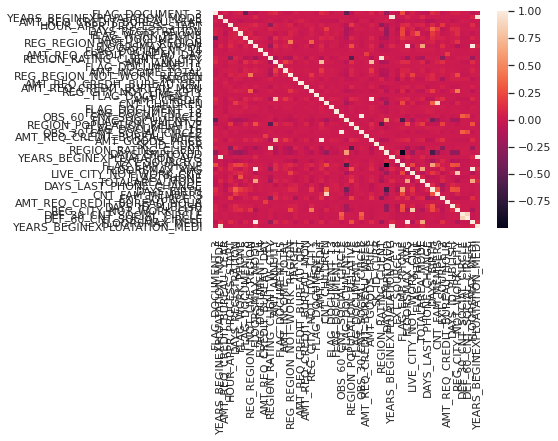

In [88]:
# not_bool_null_df['TARGET']= df['TARGET']
corr = application_train[numerical_cols].corr()
figsize = (25,16)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

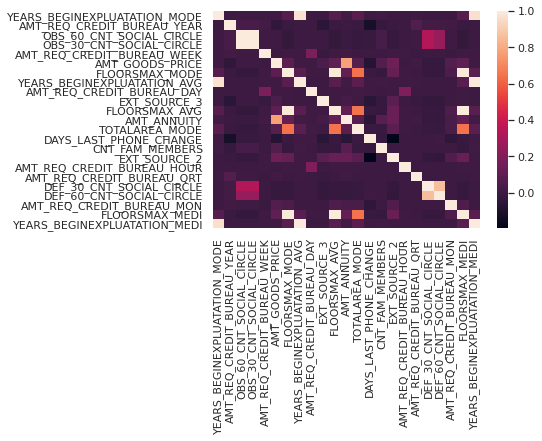

In [89]:

corr = application_train[null_numeric_columns].corr()
figsize = (25,16)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

From the heatmap we can see that many features are correlated with each other

YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG

FLOORSMAX_AVG,  FLOORSMAX_MODE and FLOORSMAX_MEDI

OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

DEF_30_CNT_SOCIAL_CIRCLE, and DEF_60_CNT_SOCIAL_CIRCLE

AMT_ANNUITY  and AMT_GOODS_PRICE

we can remove these redundant features

In [90]:
print(application_train['YEARS_BEGINEXPLUATATION_MEDI']. corr(application_train['YEARS_BEGINEXPLUATATION_AVG']))

print(application_train['FLOORSMAX_AVG']. corr(application_train['FLOORSMAX_MODE']))

print(application_train['FLOORSMAX_MODE']. corr(application_train['FLOORSMAX_MEDI']))

print(application_train['OBS_30_CNT_SOCIAL_CIRCLE']. corr(application_train['OBS_30_CNT_SOCIAL_CIRCLE']))

print(application_train['DEF_30_CNT_SOCIAL_CIRCLE']. corr(application_train['DEF_60_CNT_SOCIAL_CIRCLE']))

print(application_train['AMT_ANNUITY']. corr(application_train['AMT_GOODS_PRICE']))


0.99383776327789
0.9866100656684147
0.9890004823434936
1.0
0.8572157723739172
0.7748369275521187


In [91]:
dropping_null_numeric_cols = ['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_MODE','OBS_30_CNT_SOCIAL_CIRCLE',
                             'DEF_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY']

In [92]:
application_train.drop(dropping_null_numeric_cols, axis=1, inplace=True)
application_test.drop(dropping_null_numeric_cols, axis=1, inplace=True)

In [93]:
null_numeric_columns = list(set(null_numeric_columns)-set(dropping_null_numeric_cols))
numerical_cols = list(set(numerical_cols)-set(dropping_null_numeric_cols))
not_bool_numeric_cols =list(set(not_bool_numeric_cols)-set(dropping_null_numeric_cols))

In [94]:

print(len(null_numeric_columns))
print(len(numerical_cols))

18
48


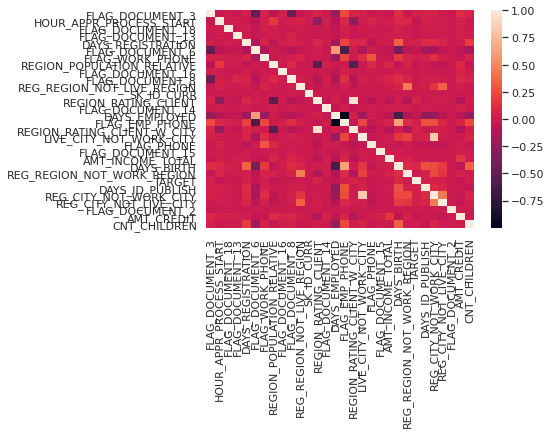

In [95]:
corr = application_train[list(set(numerical_cols)-set(null_numeric_columns))].corr()
figsize = (25,16)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT are highly correlated

In [96]:
print(application_train['REGION_RATING_CLIENT_W_CITY']. corr(application_train['REGION_RATING_CLIENT']))

0.9508416519075601


In [97]:
application_train.drop(['REGION_RATING_CLIENT_W_CITY'], axis=1, inplace=True)
application_test.drop(['REGION_RATING_CLIENT_W_CITY'], axis=1, inplace=True)

In [98]:
numerical_cols = list(set(numerical_cols)-set(['REGION_RATING_CLIENT_W_CITY']))
not_bool_numeric_cols = list(set(not_bool_numeric_cols)-set(['REGION_RATING_CLIENT_W_CITY']))

In [99]:
print(application_train.shape)
print(application_test.shape)

(307507, 55)
(48744, 54)


# 4.3 feature transform

In [100]:
def convert_to_abs(df,columns=None):
    if columns is None:
        columns= df.columns
        
    for column in columns:
        df[column] = df[column].abs()

In [101]:
conv_abs = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [102]:
convert_to_abs(application_train,conv_abs)
convert_to_abs(application_test,conv_abs)

In [103]:
application_train['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

# 4.3.1 Checking outliers and skewness to perform tranform(log, square root, cube root)

In [104]:
def get_list_of_skewed_cols(df,columns):
    skewed = []
    for col in columns:
        if is_skewed(df,col):
            skewed.append(col)
        else:
            pass
    return skewed

In [105]:
continous_cols = find_list_of_continous_var_columns(application_train,not_bool_numeric_cols)

In [106]:
skewed_cols =get_list_of_skewed_cols(application_train,continous_cols)

In [107]:
len(skewed_cols)

13

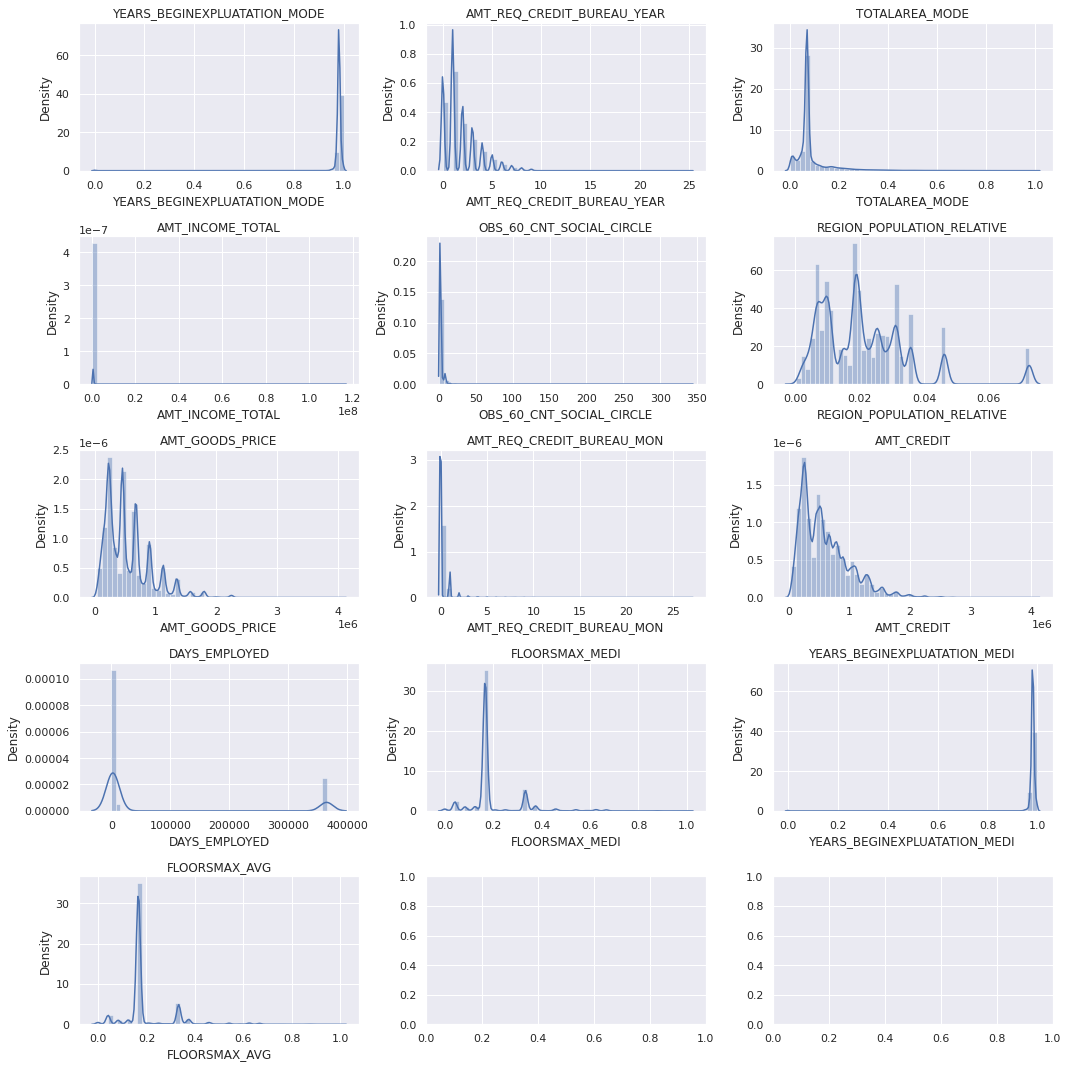

In [108]:
#checking the distribution plots of skewed columns
fig, axes = plt.subplots(nrows = 5, ncols = 3)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[skewed_cols].columns):
  sns.distplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

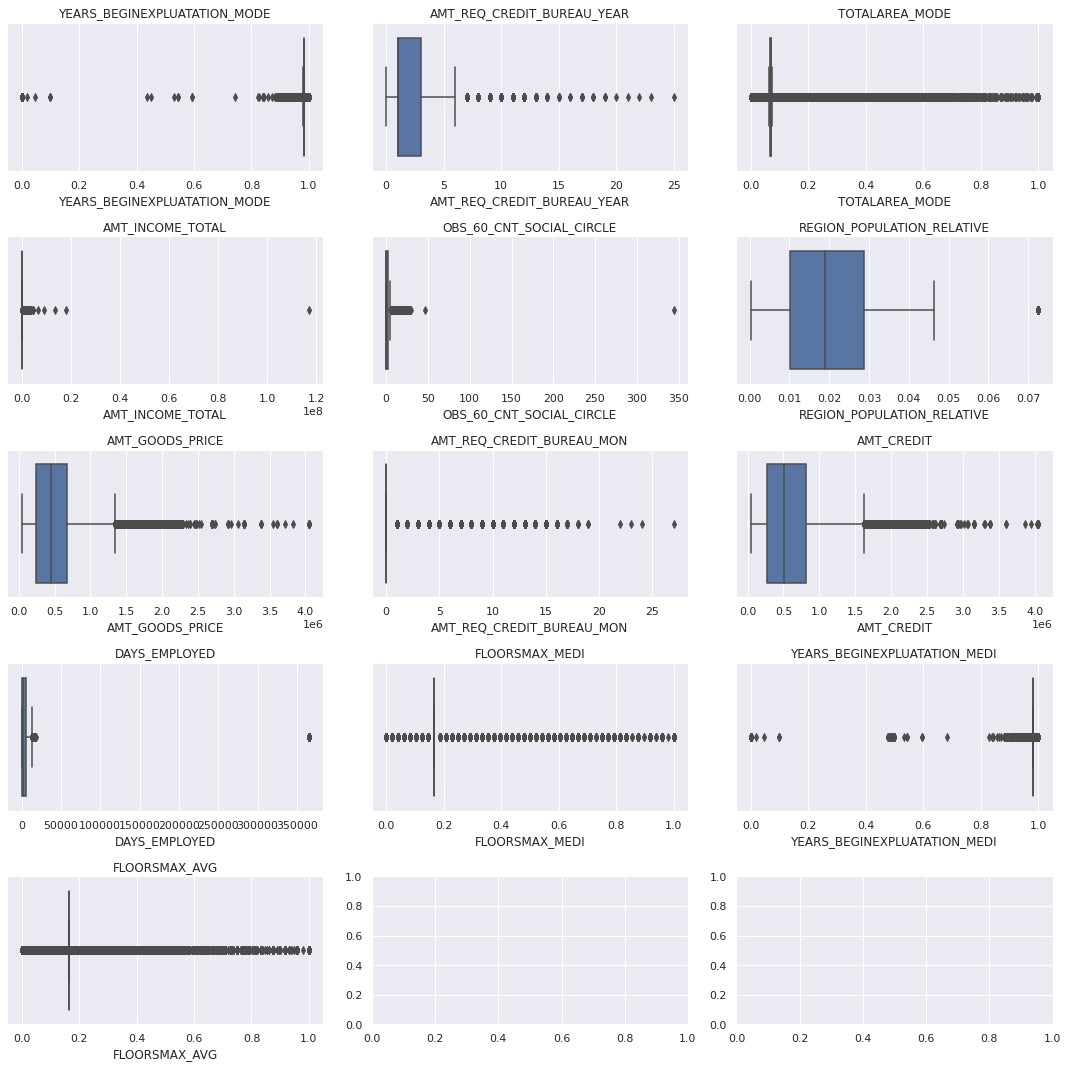

In [109]:
#checking the box plots of skewed columns
fig, axes = plt.subplots(nrows = 5, ncols = 3)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[skewed_cols].columns):
  sns.boxplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

In [110]:
application_train[skewed_cols].describe()

,YEARS_BEGINEXPLUATATION_MODE,AMT_REQ_CREDIT_BUREAU_YEAR,TOTALAREA_MODE,AMT_INCOME_TOTAL,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_MON,AMT_CREDIT,DAYS_EMPLOYED,FLOORSMAX_MEDI,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_AVG
count,307507.000000,307507.000000,307507.000000,3.075070e+05,307507.000000,307507.000000,3.075070e+05,307507.000000,3.075070e+05,307507.000000,307507.000000,307507.000000,307507.000000
mean,0.979277,1.778441,0.086258,1.687977e+05,1.400589,0.020868,5.383178e+05,0.231286,5.990286e+05,67725.569893,0.196441,0.979629,0.196635
std,0.046271,1.765512,0.079110,2.371246e+05,2.377165,0.013831,3.692898e+05,0.856801,4.024926e+05,139444.469301,0.106998,0.042910,0.106761
min,0.000000,0.000000,0.000000,2.565000e+04,0.000000,0.000290,4.050000e+04,0.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000
25%,0.981100,1.000000,0.067000,1.125000e+05,0.000000,0.010006,2.385000e+05,0.000000,2.700000e+05,933.000000,0.166700,0.981600,0.166700
50%,0.981600,1.000000,0.068800,1.471500e+05,0.000000,0.018850,4.500000e+05,0.000000,5.135310e+05,2219.000000,0.166700,0.981600,0.166700
75%,0.981600,3.000000,0.070300,2.025000e+05,2.000000,0.028663,6.795000e+05,0.000000,8.086500e+05,5707.000000,0.166700,0.982100,0.166700
max,1.000000,25.000000,1.000000,1.170000e+08,344.000000,0.072508,4.050000e+06,27.000000,4.050000e+06,365243.000000,1.000000,1.000000,1.000000


In [111]:
skewed_cols

['YEARS_BEGINEXPLUATATION_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'TOTALAREA_MODE',
 'AMT_INCOME_TOTAL',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'FLOORSMAX_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG']

In [112]:
def check_log_transform(df,columns):
    log_transform_col = []
    for col in columns:
        if any(df[col] <= 0):
            pass
        else:
            log_transform_col.append(col) 
    return log_transform_col

In [113]:
apply_log_trans = check_log_transform(application_train,skewed_cols)

In [114]:
apply_log_trans

['AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT']

In [115]:
apply_log_trans.remove('REGION_POPULATION_RELATIVE')

In [116]:
apply_log_trans

['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_CREDIT']

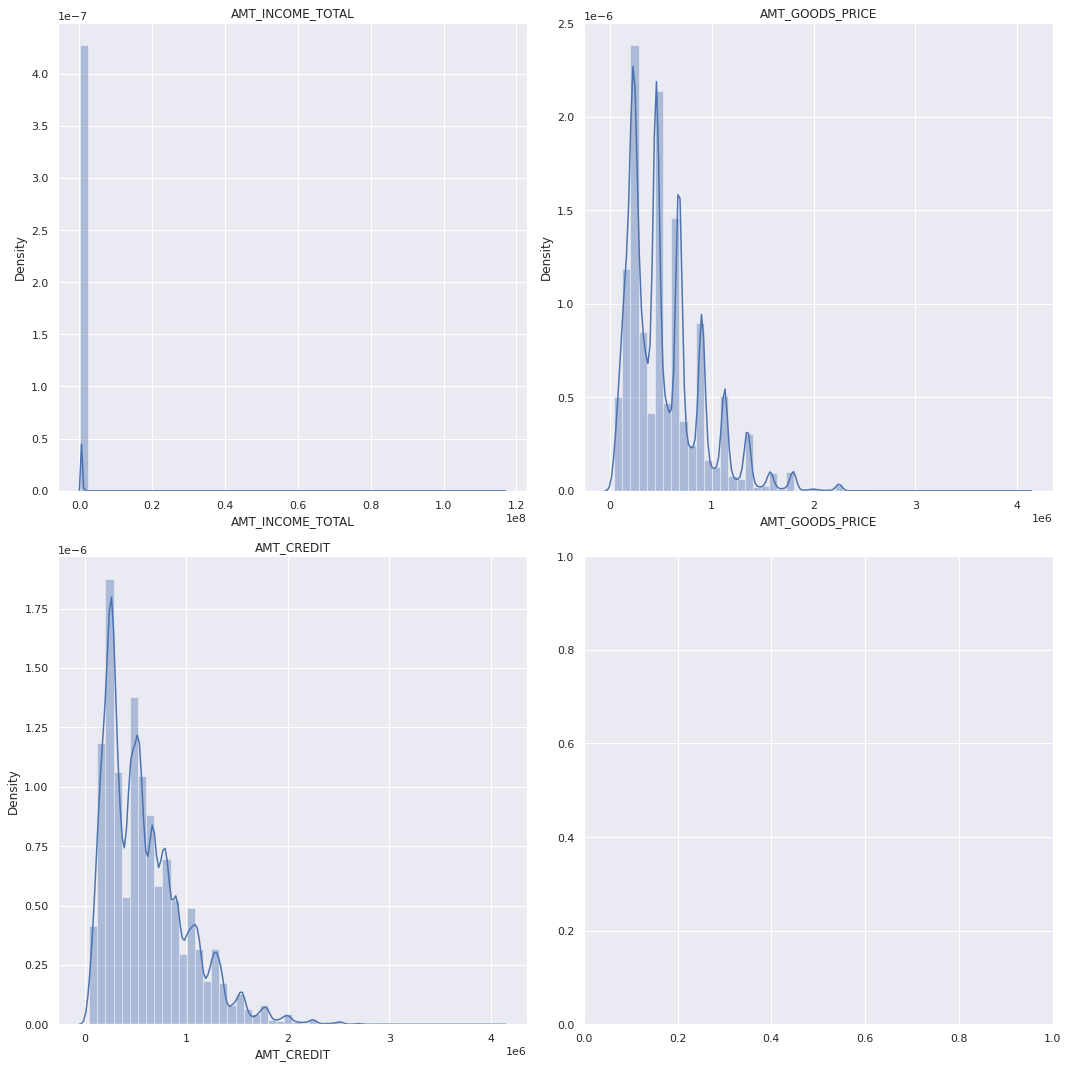

In [117]:
# distribution before applying log transform
fig, axes = plt.subplots(nrows = 2, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[apply_log_trans].columns):
  sns.distplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

In [118]:
for col in apply_log_trans:
    application_train[col] = np.log(application_train[col])
    application_train[col] = np.log(application_train[col])

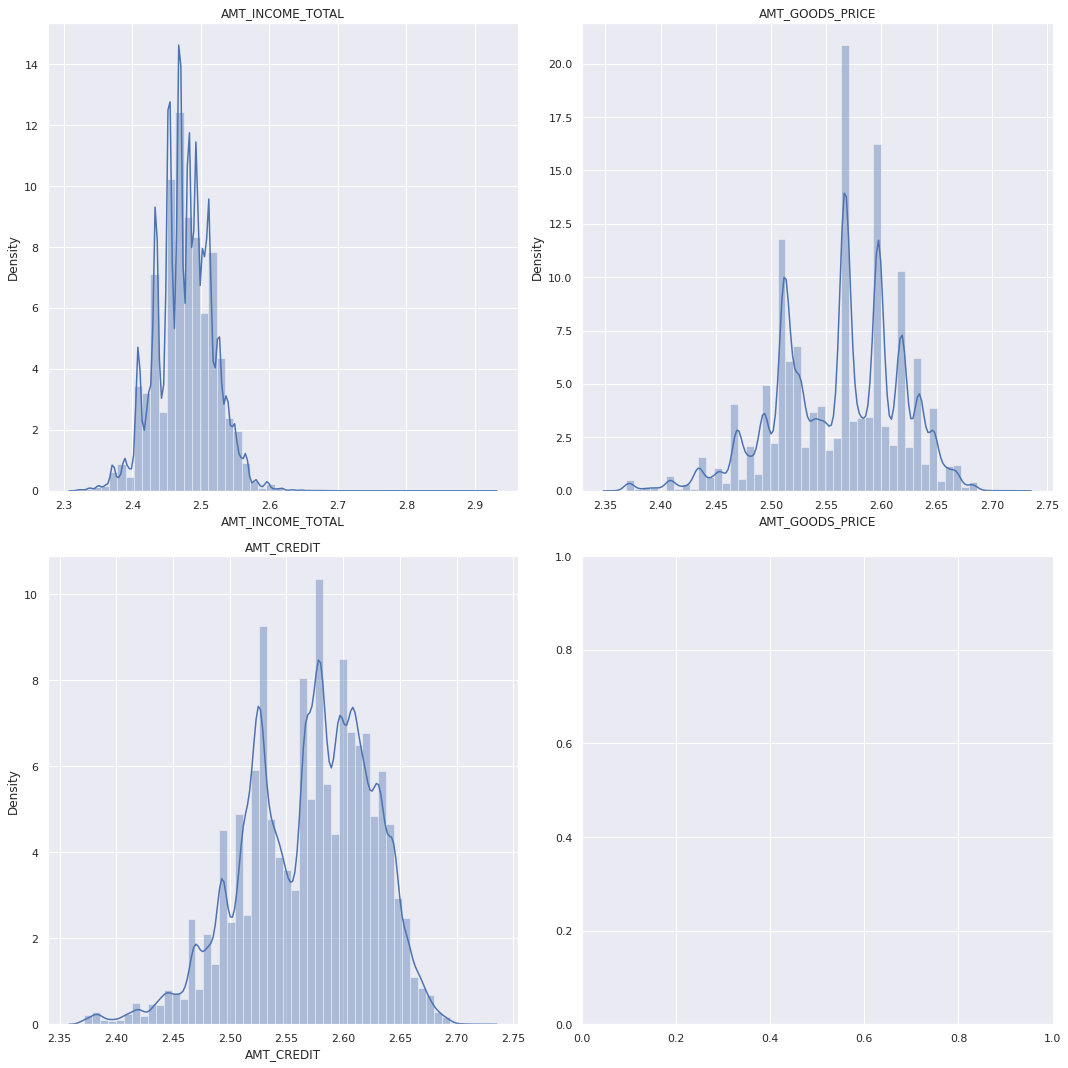

In [120]:
#after applying log transform
fig, axes = plt.subplots(nrows = 2, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[apply_log_trans].columns):
  sns.distplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

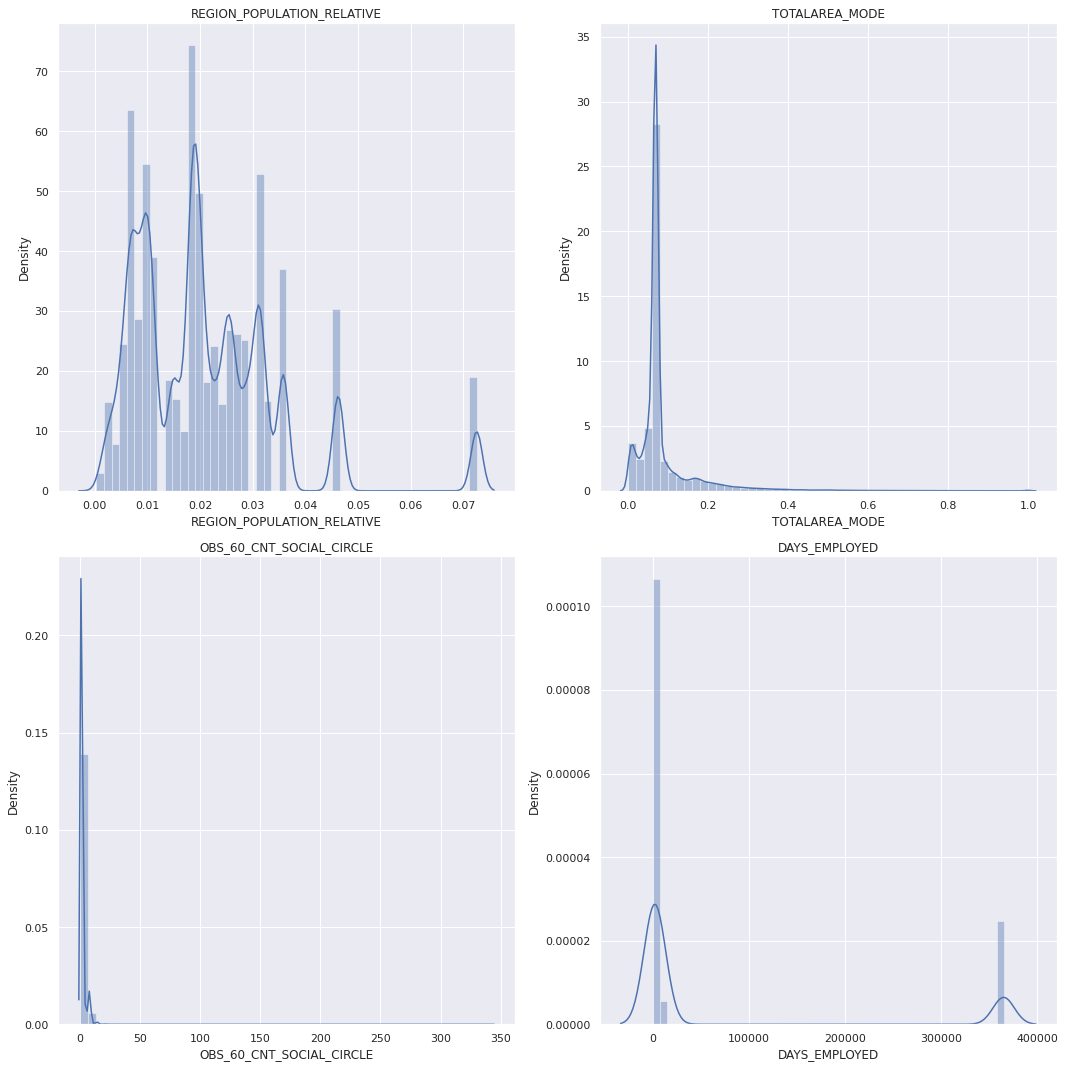

In [152]:
apply_sqrt_transform =['REGION_POPULATION_RELATIVE','TOTALAREA_MODE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_EMPLOYED']

#before applying sqrt transform
fig, axes = plt.subplots(nrows = 2, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[apply_sqrt_transform].columns):
  sns.distplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

In [153]:
for col in apply_sqrt_transform:
    application_train[col] = np.sqrt(application_train[col])
    application_train[col] = np.sqrt(application_train[col])

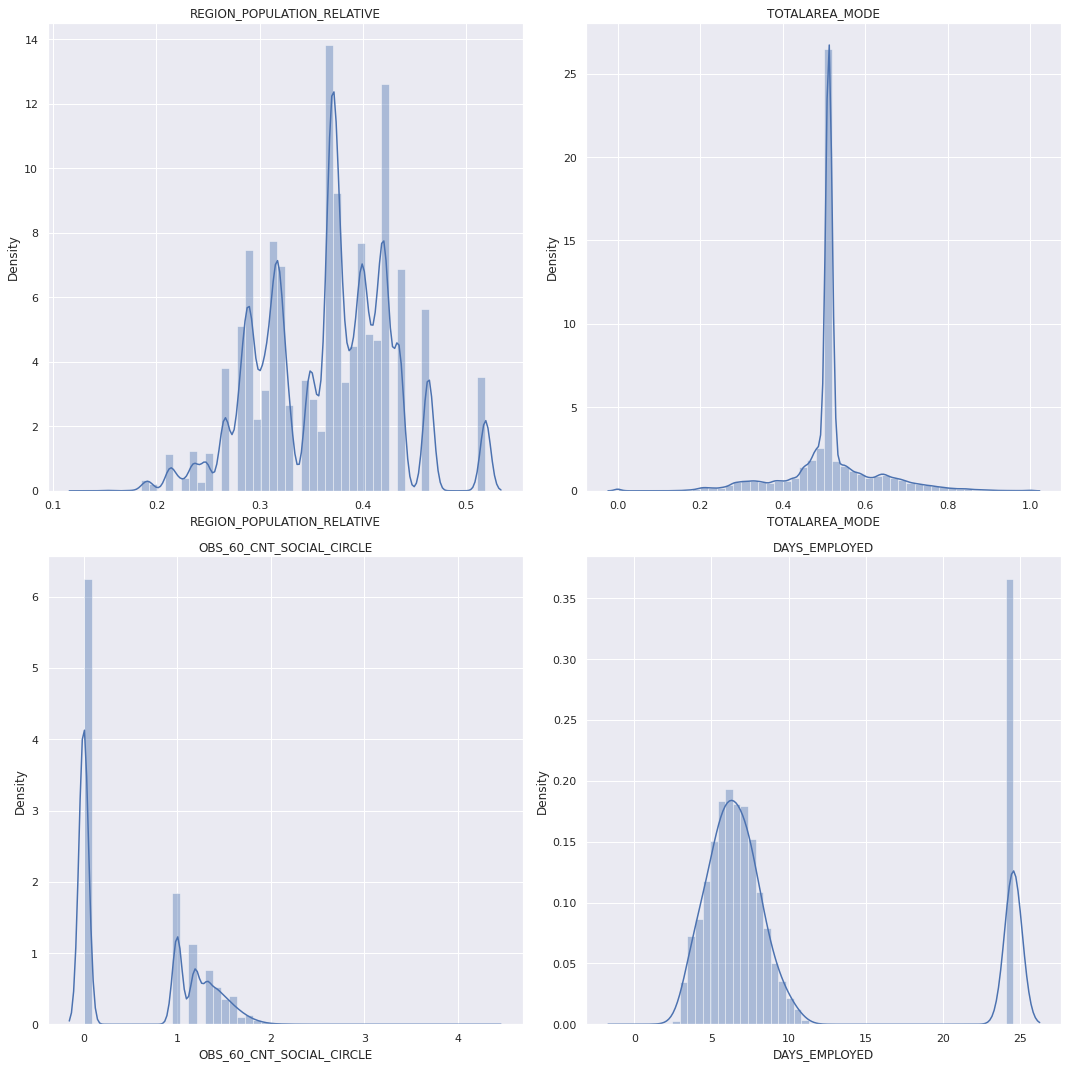

In [154]:
apply_sqrt_transform =['REGION_POPULATION_RELATIVE','TOTALAREA_MODE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_EMPLOYED']

#after applying sqrt transform
fig, axes = plt.subplots(nrows = 2, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[apply_sqrt_transform].columns):
  sns.distplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

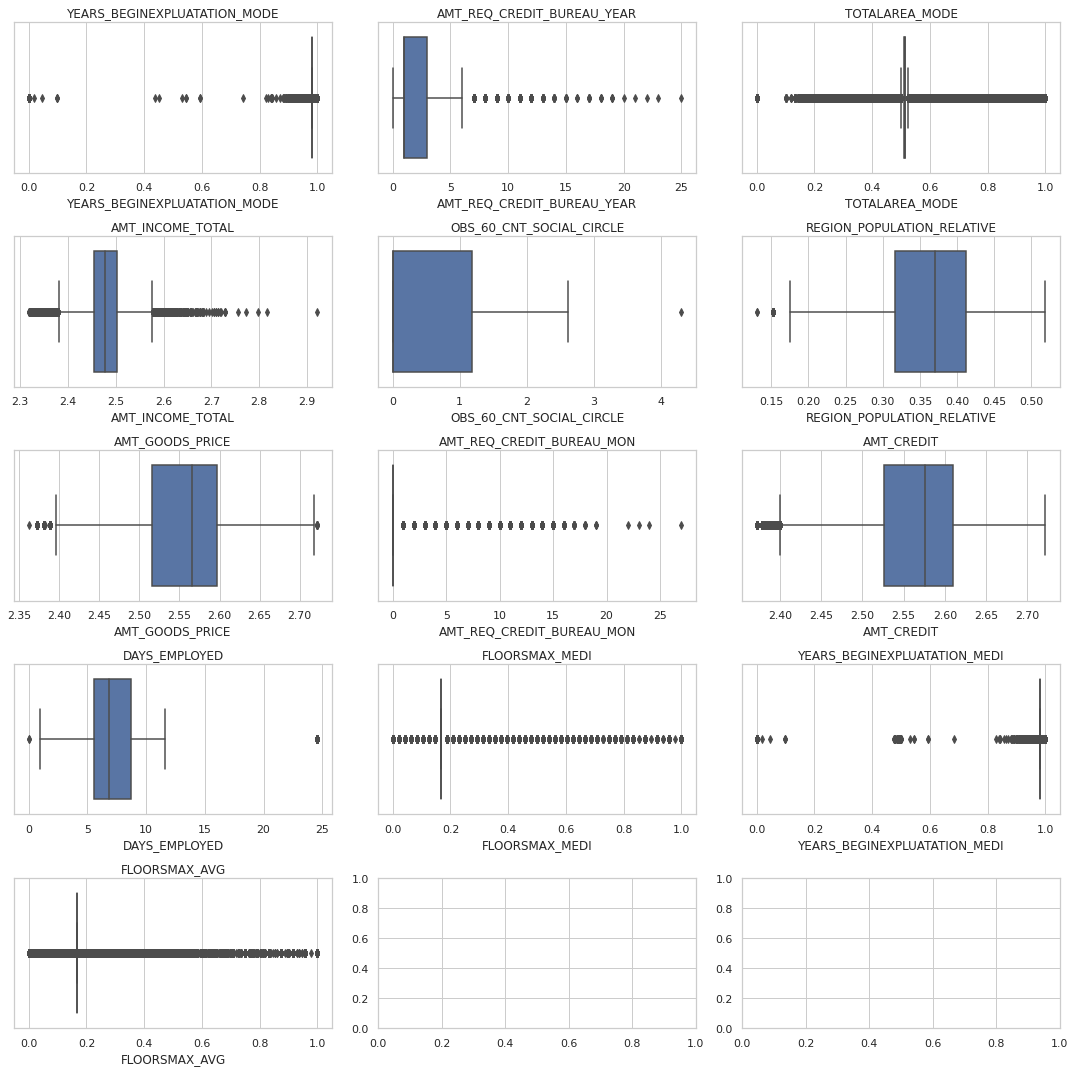

In [324]:
#checking the distribution plots of skewed columns
fig, axes = plt.subplots(nrows = 5, ncols = 3)    
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, application_train[skewed_cols].columns):
  sns.boxplot(application_train[col], ax = ax)
  ax.set_title(col)
fig.tight_layout()

In [155]:
application_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean          9.688952
std           7.132758
min           0.000000
25%           5.526758
50%           6.863400
75%           8.691645
max          24.583600
Name: DAYS_EMPLOYED, dtype: float64

In [156]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,0,2.502951,2.558434,2.546984,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,2.526223,2.644248,2.634568,4,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,0,2.408735,2.469203,2.469203,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,0,2.469203,2.537890,2.533815,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,0,2.460244,2.576272,2.576272,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
application_train.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_GOODS_PRICE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_PHONE                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_T

In [158]:
application_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,...,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000
mean,278181.527256,0.08073,0.095201,0.341648,0.340106,0.417047,2.476473,2.568806,2.560364,4.670277,...,0.002937,0.00121,0.009928,0.008130,0.006465,0.007161,0.03449,0.231286,0.266830,1.778441
std,102790.132982,0.27242,0.293493,0.474263,0.473745,0.722119,0.041016,0.055419,0.055827,2.544523,...,0.054110,0.03476,0.099145,0.089799,0.084721,0.114169,0.20577,0.856801,0.904596,1.765512
min,100002.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.317700,2.371590,2.361708,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,189146.500000,0.00000,0.000000,0.000000,0.000000,0.000000,2.453649,2.526223,2.516254,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,278203.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.476472,2.576351,2.566256,7.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,367143.500000,0.00000,0.000000,1.000000,1.000000,1.000000,2.502951,2.610299,2.597425,7.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000
max,456255.000000,1.00000,1.000000,1.000000,1.000000,19.000000,2.921961,2.722231,2.722231,7.000000,...,1.000000,1.00000,1.000000,1.000000,4.000000,9.000000,8.00000,27.000000,261.000000,25.000000


In [159]:
#dropping SK_ID_CURR column as it doesnt play any role in prediction of the target variable
application_train.drop('SK_ID_CURR',axis='columns', inplace=True)
application_test.drop('SK_ID_CURR',axis='columns', inplace=True)

In [160]:
print(application_train.shape)
print(application_test.shape)

(307507, 54)
(48744, 53)


# 5. Model Training

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler


Y = application_train['TARGET']              
X = application_train.drop('TARGET', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,stratify = Y, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(215254, 53)
(92253, 53)
(215254,)
(92253,)


# 5.1 scaling

In [164]:
scaler =  MinMaxScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

# 5.2 Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score


sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, Y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_predictions_train = sklearn_model.predict(X_train)

In [166]:
print("test confusion matrix")
print(confusion_matrix(Y_test,sklearn_predictions))
print("---------------"*8)

print("test Classification report ")
print(classification_report(Y_test, sklearn_predictions))
print("---------------"*8)

print("Training Classification report ")
print(classification_report(Y_train, sklearn_predictions_train))

test confusion matrix
[[84740    65]
 [ 7398    50]]
------------------------------------------------------------------------------------------------------------------------
test Classification report 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84805
           1       0.43      0.01      0.01      7448

    accuracy                           0.92     92253
   macro avg       0.68      0.50      0.49     92253
weighted avg       0.88      0.92      0.88     92253

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197877
           1       0.51      0.01      0.01     17377

    accuracy                           0.92    215254
   macro avg       0.72      0.50      0.49    215254
weighted avg       0.89      0.92      0.88   

[[84740    65]
 [ 7398    50]]


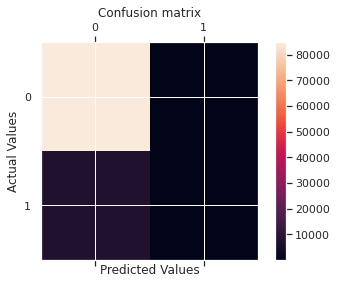

In [167]:

cm = confusion_matrix(Y_test, sklearn_predictions)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [168]:
# Scores here
precision = precision_score(Y_test, sklearn_predictions)
print('Precision: %f' % precision)

recall = recall_score(Y_test, sklearn_predictions)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, sklearn_predictions)
print('F1 score: %f' % f1)

Precision: 0.434783
Recall: 0.006713
F1 score: 0.013222


In [171]:
output_log = sklearn_model.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_log})
compression_opts = dict(method='zip',
                        archive_name='outlog.csv')  
df_result.to_csv('outlog.zip', index=False,
          compression=compression_opts)  

# 5.3 Grid Search CV Logistic Regression

In [174]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid_values, cv = 10)

# logreg_cv = GridSearchCV(logreg, param_grid = grid_values,scoring = 'recall',cv =10)

logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)




tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9193371546582298


In [175]:
#Predict values based on new parameters
y_pred_acc = logreg_cv.predict(X_test)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(Y_test,y_pred_acc)

Precision Score : 0.39361702127659576
Recall Score : 0.004967776584317938
F1 Score : 0.0098117210289048


array([[84748,    57],
       [ 7411,    37]])

In [176]:
output_log = logreg_cv.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_log})
compression_opts = dict(method='zip',
                        archive_name='outlogcv.csv')  
df_result.to_csv('outlogcv.zip', index=False,
          compression=compression_opts) 

# 5.4 USING UNDER SAMPLING 

In [177]:
# Undersample the data
no_risk = len(application_train[application_train['TARGET'] == 1])
non_risk_indices = application_train[application_train.TARGET == 0].index

random_indices = np.random.choice(non_risk_indices,no_risk, replace=False)
risk_indices = application_train[application_train.TARGET == 1].index

under_sample_indices = np.concatenate([risk_indices,random_indices])
under_sample = application_train.loc[under_sample_indices]

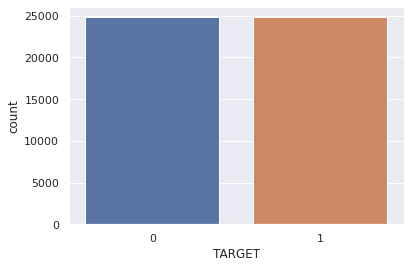

In [178]:
## Plotting the distribution of data for undersampling
%matplotlib inline
sns.countplot(x='TARGET', data=under_sample)
plt.show()

In [179]:
Y_under = under_sample['TARGET']              
X_under = under_sample.drop('TARGET', axis=1)
X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(X_under, Y_under, test_size = 0.2,stratify = Y_under, random_state=5)
print(X_train_under.shape)
print(X_test_under.shape)
print(Y_train_under.shape)
print(Y_test_under.shape)

(39720, 53)
(9930, 53)
(39720,)
(9930,)


In [180]:
scaler =  MinMaxScaler()
X_train_under = scaler.fit_transform( X_train_under )
X_test_under = scaler.transform( X_test_under )

In [181]:
from sklearn.linear_model import LogisticRegression 

sklearn_model_under = LogisticRegression()
sklearn_model_under.fit(X_train_under, Y_train_under)
sklearn_predictions_under = sklearn_model_under.predict(X_test_under)
sklearn_predictions_train_under = sklearn_model_under.predict(X_train_under)

[[3363 1602]
 [1650 3315]]


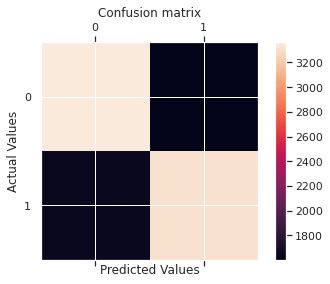

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

# cm = confusion_matrix(Y_test, sklearn_predictions)
cm = confusion_matrix(Y_test_under, sklearn_predictions_under)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [183]:
# Scores here
precision = precision_score(Y_test_under, sklearn_predictions_under)
print('Precision: %f' % precision)

recall = recall_score(Y_test_under, sklearn_predictions_under)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test_under, sklearn_predictions_under)
print('F1 score: %f' % f1)

Precision: 0.674192
Recall: 0.667674
F1 score: 0.670917


under sampling somehow improved the accuracy and precision

In [184]:
output = sklearn_model_under.predict(application_test) 

In [187]:
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output})

In [188]:
compression_opts = dict(method='zip',
                        archive_name='outundersamplelog.csv')  
df_result.to_csv('outundersamplelog.zip', index=False,
          compression=compression_opts)  

# 5.4.1 using under sampling and gridsearch cv

In [189]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values_under = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_under = LogisticRegression()
logreg_cv_under = GridSearchCV(logreg_under, grid_values_under, cv = 10)

# logreg_cv = GridSearchCV(logreg, param_grid = grid_values,scoring = 'recall',cv =10)

logreg_cv_under.fit(X_train_under,Y_train_under)

print("tuned hpyerparameters :(best parameters) ",logreg_cv_under.best_params_)
print("accuracy :",logreg_cv_under.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.6712235649546828


In [190]:
#Predict values based on new parameters
y_pred_acc_under = logreg_cv_under.predict(X_test)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc_under)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc_under)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc_under)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(Y_test,y_pred_acc_under)

Precision Score : 0.1465502769850596
Recall Score : 0.7032760472610097
F1 Score : 0.24255614725630933


array([[54301, 30504],
       [ 2210,  5238]])

In [192]:
#Predict values based on new parameters
y_pred_under = logreg_cv_under.predict(X_test_under)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test_under,y_pred_under)))
print('Recall Score : ' + str(recall_score(Y_test_under,y_pred_under)))
print('F1 Score : ' + str(f1_score(Y_test_under,y_pred_under)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(Y_test_under,y_pred_under)

Precision Score : 0.6749898497766951
Recall Score : 0.6696878147029205
F1 Score : 0.6723283793347488


array([[3364, 1601],
       [1640, 3325]])

In [193]:
output_log = logreg_cv.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_log})
compression_opts = dict(method='zip',
                        archive_name='outlogcvundersampled.csv')  
df_result.to_csv('outlogcvundersampled.zip', index=False,
          compression=compression_opts) 

# XGBOOST

In [194]:
from sklearn.tree import DecisionTreeClassifier   #importing model
from sklearn.neighbors import KNeighborsClassifier #import method
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,classification_report, plot_confusion_matrix

In [195]:

classifier_xg = XGBClassifier()
classifier_xg.fit(X_train,Y_train)
y_pre =classifier_xg.predict(X_train)
y_pred =classifier_xg.predict(X_test)



print("validation confusion matrix")
print(confusion_matrix(Y_test,y_pred))
print("---------------"*8)

print("Validation Classification report ")
print(classification_report(Y_test, y_pred))
print("---------------"*8)

print("Training Classification report ")
print(classification_report(Y_train, y_pre))

[21:27:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
validation confusion matrix
[[84600   205]
 [ 7263   185]]
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84805
           1       0.47      0.02      0.05      7448

    accuracy                           0.92     92253
   macro avg       0.70      0.51      0.50     92253
weighted avg       0.88      0.92      0.88     92253

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support


In [196]:
# Scores here
precision = precision_score(Y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(Y_test, y_pred)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.474359
Recall: 0.024839
F1 score: 0.047206


In [198]:
output_xg = classifier_xg.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_xg})
compression_opts = dict(method='zip',
                        archive_name='outxg.csv')  
df_result.to_csv('outxg.zip', index=False,
          compression=compression_opts) 

# XGBOOST on UnderSampled Data

In [200]:
classifier_xg_under = XGBClassifier()
classifier_xg_under.fit(X_train_under,Y_train_under)
y_pre = classifier_xg_under.predict(X_train_under)
y_pred =classifier_xg_under.predict(X_test_under)

#Predict values based on new parameters
y_pred_under = logreg_cv_under.predict(X_test_under)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test_under,y_pred)))
print('Recall Score : ' + str(recall_score(Y_test_under,y_pred)))
print('F1 Score : ' + str(f1_score(Y_test_under,y_pred)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(Y_test_under,y_pred)

[21:37:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision Score : 0.6709427815108939
Recall Score : 0.6636455186304129
F1 Score : 0.6672742000810045


array([[3349, 1616],
       [1670, 3295]])

In [201]:
#Predict values based on new parameters
y_pred_test = logreg_cv_under.predict(X_test)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_test)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(Y_test,y_pred_test)

Precision Score : 0.1465502769850596
Recall Score : 0.7032760472610097
F1 Score : 0.24255614725630933


array([[54301, 30504],
       [ 2210,  5238]])

In [202]:
output_xg = classifier_xg.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_xg})
compression_opts = dict(method='zip',
                        archive_name='outxgundersample.csv')  
df_result.to_csv('outxgundersample.zip', index=False,
          compression=compression_opts) 

# XGBOOST RANDOM SEARCH CV

In [213]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6,7,8,9,10],
        'booster':['gbtree'],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 
        'n_estimators': [100]  
    
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [215]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


# start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, Y_train)
# timer(start_time) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:34:21] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:34:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f67da54ea50>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                        

In [216]:
# Scores here

y_pre_rs= random_search.predict(X_train)
y_pred_rs = random_search.predict(X_test)

precision = precision_score(Y_test, y_pred_rs)
print('Precision: %f' % precision)

recall = recall_score(Y_test, y_pred_rs)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, y_pred_rs)
print('F1 score: %f' % f1)

Precision: 0.541667
Recall: 0.005236
F1 score: 0.010372


In [217]:
output_xg = classifier_xg.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_xg})
compression_opts = dict(method='zip',
                        archive_name='outxgrandom.csv')  
df_result.to_csv('outxgrandom.zip', index=False,
          compression=compression_opts) 

# NAIVE BAYES

In [203]:

classifier_nb = GaussianNB()
classifier_nb.fit(X_train,Y_train)
y_pre =classifier_nb.predict(X_train)
y_pred =classifier_nb.predict(X_test)

print("validation confusion matrix")
print(confusion_matrix(Y_test,y_pred))
print("---------------"*8)

print("Validation Classification report ")
print(classification_report(Y_test, y_pred))
print("---------------"*8)

print("Training Classification report ")
print(classification_report(Y_train, y_pre))

validation confusion matrix
[[63938 20867]
 [ 3867  3581]]
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     84805
           1       0.15      0.48      0.22      7448

    accuracy                           0.73     92253
   macro avg       0.54      0.62      0.53     92253
weighted avg       0.88      0.73      0.79     92253

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84    197877
           1       0.15      0.50      0.23     17377

    accuracy                           0.73    215254
   macro avg       0.55      0.63      0.53    215254
weighted avg       0.88      0.73 

In [204]:
# Scores here
precision = precision_score(Y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(Y_test, y_pred)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.146474
Recall: 0.480800
F1 score: 0.224542


In [207]:
output_nb = classifier_nb.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_nb})
compression_opts = dict(method='zip',
                        archive_name='outnb.csv')  
df_result.to_csv('outnb.zip', index=False,
          compression=compression_opts) 

# Logistic Regression Using Class Weights

In [209]:

lr_cls_wt = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_cls_wt.fit(X_train, Y_train)

# Predicting on the test data
pred_test = lr_cls_wt.predict(X_test)

# Scores here
precision = precision_score(Y_test, pred_test)
print('Precision: %f' % precision)

recall = recall_score(Y_test, pred_test)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, pred_test)
print('F1 score: %f' % f1)




Precision: 0.154299
Recall: 0.658029
F1 score: 0.249981


In [238]:
output_nb = classifier_nb.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_nb})
compression_opts = dict(method='zip',
                        archive_name='outlog_cls_wt.csv')  
df_result.to_csv('outlog_cls_wt.zip', index=False,
          compression=compression_opts) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

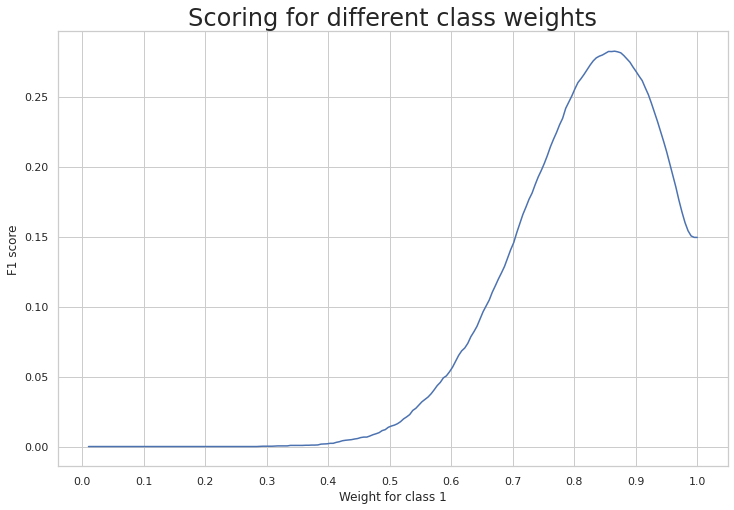

In [218]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, Y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)


In [241]:

lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.5, 1: 1})
lr.fit(X_train, Y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(Y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

# #Ploting the confusion matrix
# conf_matrix(Y_test, pred_test)

The f1 score for the testing data: 0.2759397726108778


In [242]:
# Scores here
precision = precision_score(Y_test, pred_test)
print('Precision: %f' % precision)

recall = recall_score(Y_test, pred_test)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, pred_test)
print('F1 score: %f' % f1)


Precision: 0.223050
Recall: 0.361708
F1 score: 0.275940


In [237]:
output_nb = classifier_nb.predict(application_test)
df_result = pd.DataFrame({'SK_ID_CURR':test_original['SK_ID_CURR'],'TARGET': output_nb})
compression_opts = dict(method='zip',
                        archive_name='outlog_cls_wt_manual.csv')  
df_result.to_csv('outlog_cls_wt_manual.zip', index=False,
          compression=compression_opts) 